## Graph and Cities

In [1]:
import matplotlib.pyplot as plt

class Node:
    def __init__(self, val, x=0, y=0):
        self.val = val
        self.x = x
        self.y = y
        self.nbs = []
    
    # def __eq__(self, value: object) -> bool:
    #     return self.val

class Graph:
    def __init__(self):
        self.nodes = []
    
    def addNode(self, node: Node):
        self.nodes.append(node)
    
    def removeNode(self, node: Node):
        for i in range(len(self.nodes)):
            for j in range(len(self.nodes[i].nbs)):
                if self.nodes[i].nbs[j][0] == node:
                    self.nodes[i].nbs.pop(j)
        
        self.nodes.remove(node)

    def addEdge(self, source: Node, destination: Node, cost: int):
        found_source = False
        found_destination = False
        for i in range(len(self.nodes)):
            if not found_source and self.nodes[i].val == source.val:
                found_source = self.nodes[i]
            
            if not found_destination and self.nodes[i].val == destination.val:
                found_destination = self.nodes[i]
                
        if not found_source:
            self.nodes.append(source)
            found_source = self.nodes[-1]
        
        if not found_destination:
            self.nodes.append(destination)
            found_destination = self.nodes[-1]
        
        found_source.nbs.append((found_destination, cost))
    

    def removeEdge(self, source: Node, destination: Node, cost: int):
        found = False
        for i in range(len(self.nodes)):
            if self.nodes[i].val == source.val:
                found = self.nodes[i]
                break
        
        if not found:
            return

        for j in range(len(found.nbs)):
            if found.nbs[j] == (destination, cost):
                return found.nbs.pop(j)

    def printGraph(self, coords):
        plt.figure(figsize=(10, 6))
        edges = set()
        for n in self.nodes:
            for ed, cost in n.nbs:
                if (ed, n) not in edges:
                    edges.add((n, ed))

        for key in coords:
            y, x = coords[key]
            plt.scatter(x, y, edgecolors='black', s=100)
            plt.text(x, y, key.val, fontsize=10)

        for edge in edges:
            start, end = edge
            y_start, x_start = coords[start]
            y_end, x_end = coords[end]
            plt.plot([x_start, x_end], [y_start, y_end], 'k-', alpha=0.5)

        plt.grid(True)
        plt.show()
        

    def __str__(self):
        s = "\n"
        for n in self.nodes:
            nodes = "[ "
            for nb in n.nbs:
                nodes += f"({nb[0].val}, {nb[1]}) "
            nodes += "]"
            s += f"{n.val} : {nodes}\n"

        return s


In [2]:
# testing graph class
graph = Graph()
a = Node('a')
b = Node('b')
c = Node('c')
d = Node('d')
e = Node('e')
f = Node('f')
g = Node('g')

graph.addEdge(a, b, 1)
graph.addEdge(c, d, 2)
graph.addEdge(c, a, 3)
graph.addEdge(d, e, 6)
graph.addEdge(e, d, 2)
graph.addEdge(d, e, 9)
graph.addEdge(f, g, 2)

print(graph)

graph.removeEdge(a, b, 1)
graph.removeEdge(a, b, 1)
graph.removeEdge(f, g, 2)
graph.removeEdge(d, e, 2)
graph.removeEdge(d, e, 6)
graph.removeEdge(e, d, 2)

print(graph)


a : [ (b, 1) ]
b : [ ]
c : [ (d, 2) (a, 3) ]
d : [ (e, 6) (e, 9) ]
e : [ (d, 2) ]
f : [ (g, 2) ]
g : [ ]


a : [ ]
b : [ ]
c : [ (d, 2) (a, 3) ]
d : [ (e, 9) ]
e : [ ]
f : [ ]
g : [ ]



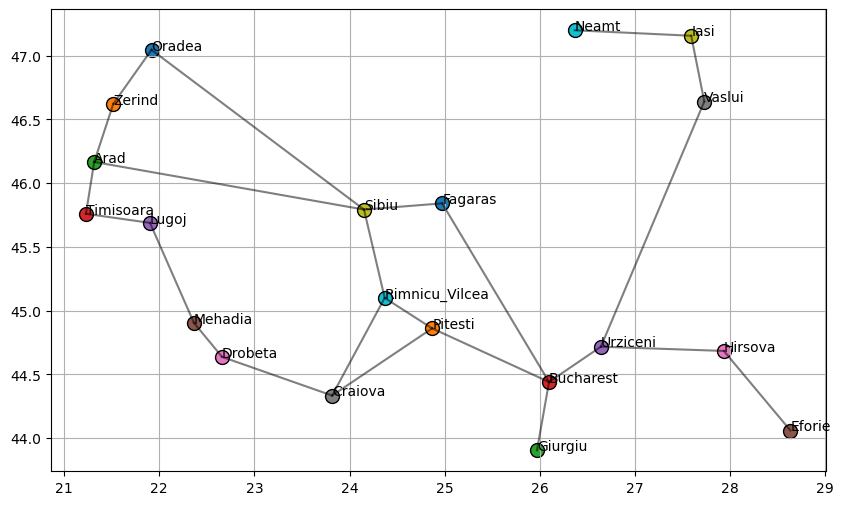

In [3]:
import math
import matplotlib.pyplot as plt 

def getDistance(city1, city2, coords):
    x1, x2 = coords[city1][1], coords[city2][1]
    y1, y2 = coords[city1][0], coords[city2][0]

    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


file = open("./data.txt", "r")
coords = {} # map city names -> coordinates
nodes = {} # map city names -> node objects
cities = set()

line = file.readline()
while line:
    line = file.readline()
    if line.strip():
        entry = line.split("    ")
        city, lat, long = entry[0], float(entry[1].strip()), float(entry[2].strip())
        
        if city not in nodes:
            nodes[city] = Node(city)
        cities.add(city)
        coords[nodes[city]] = (lat, long)

cities = list(cities)
file.close()

graph = Graph()

file = open("./connections.txt", "r")
edges = []
line = file.readline()
while line:
    res = line.split(" ")
    c1, c2 = res[0].strip(), res[1].strip()
    edges.append([nodes[c1], nodes[c2]])

    d = getDistance(nodes[c1], nodes[c2], coords)
    d = round(d, 4)
    graph.addEdge(nodes[c1], nodes[c2], d)
    graph.addEdge(nodes[c2], nodes[c1], d)
    
    line = file.readline()

file.close()

graph.printGraph(coords)

## Experiment 1 - Search City Times

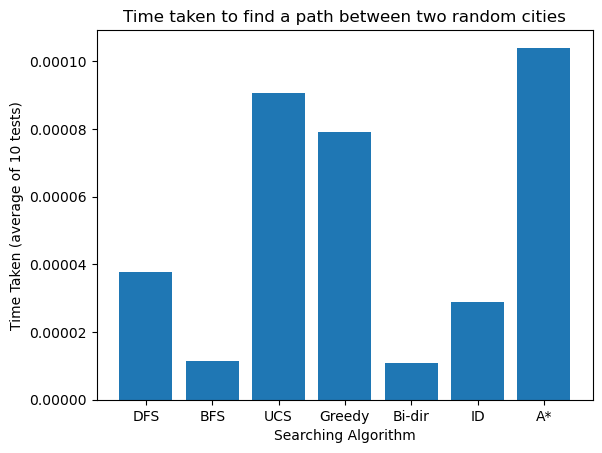

<BarContainer object of 7 artists>

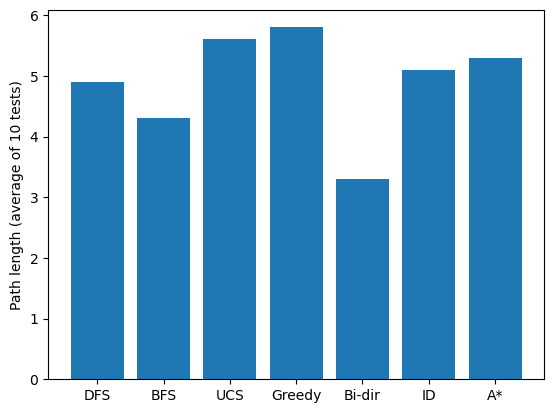

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from experiment_1_cities_benchmark import dfs_times, dfs_path
from experiment_1_cities_benchmark import bfs_times, bfs_path
from experiment_1_cities_benchmark import ucs_times, ucs_path
from experiment_1_cities_benchmark import greedy_times, greedy_path
from experiment_1_cities_benchmark import bidir_times, bidir_path
from experiment_1_cities_benchmark import iterdep_times, iterdep_path
from experiment_1_cities_benchmark import aStar_times, aStar_path

times = [
    sum(dfs_times) / 10,
    sum(bfs_times) / 10,
    sum(ucs_times) / 10,
    sum(greedy_times) / 10,
    sum(bidir_times) / 10,
    sum(iterdep_times) / 10,
    sum(aStar_times) / 10
]

path = [
    sum(dfs_path) / 10,
    sum(bfs_path) / 10,
    sum(ucs_path) / 10,
    sum(greedy_path) / 10,
    sum(bidir_path) / 10,
    sum(iterdep_path) / 10,
    sum(aStar_path) / 10
]

titles = ["DFS", "BFS", "UCS", "Greedy", "Bi-dir", "ID", "A*"]
plt.title('Time taken to find a path between two random cities')
plt.xlabel('Searching Algorithm')
plt.ylabel('Time Taken (average of 10 tests)')
plt.bar(titles, times)
plt.show()

plt.ylabel('Path length (average of 10 tests)')
plt.bar(titles, path)

## Experiment 2 - Random Graphs Search Times

#### Part I - Time and path length for each variant

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from experiment_2_randomized_graphs import results, variations

times = []
path_lens = []
for res in results:
    time = []
    len_ = []
    for t, l in res:
        time.append(t)
        len_.append(l)
    
    times.append(time)
    path_lens.append(len_)

i = 0
for c, p in variations:
    titles = ["DFS", "BFS", "UCS", "Greedy", "Bi-dir", "ID", "A*"]
    plt.title(f'Time recorded with {c} nodes with an edge probability of {p}')
    plt.xlabel('Searching Algorithm')
    plt.ylabel('Time Taken (average of 5 tests)')
    plt.bar(titles, times[i])
    plt.show()

    plt.title(f'Length of path recorded with {c} nodes with an edge probability of {p}')
    plt.xlabel('Searching Algorithm')
    plt.ylabel('Time Taken (average of 5 tests)')
    plt.bar(titles, path_lens[i])
    plt.show()

    i += 1
    

#### Part II - Average time and path length across all paths

In [ ]:
average_time = []
average_len = []
for i in range(len(times[0])):
    t = p = 0
    for j in range(len(times)):
        t += times[j][i]
        p += path_lens[j][i]
    
    average_time.append(t)
    average_len.append(p)

titles = ["DFS", "BFS", "UCS", "Greedy", "Bi-dir", "ID", "A*"]
plt.title(f'Average times across all generated graphs')
plt.xlabel('Searching Algorithm')
plt.ylabel('Time Taken')
plt.bar(titles, list(map(lambda x: x / len(average_time), average_time)))
plt.show()

plt.title(f'Average path length across all generated graphs')
plt.xlabel('Searching Algorithm')
plt.ylabel('Time Taken (average of 5 tests)')
plt.bar(titles, list(map(lambda x: x / len(average_len), average_len)))
plt.show()

## Experiment 3 - Measures of Centrality

In [1]:
from tabulate import tabulate
from experiment_3_measures_of_centrality import result

for key in result:
    print(f'\n{key}')
    arr = [["#", "City", "Value"]]
    i = 1
    for node, val in result[key]:
        arr.append([i, node.val, val])
        i += 1
    print(tabulate(arr, headers="firstrow", tablefmt="simple_grid"))


Degree Centrality
┌─────┬────────────────┬───────────┐
│   # │ City           │     Value │
├─────┼────────────────┼───────────┤
│   1 │ Sibiu          │ 0.210526  │
├─────┼────────────────┼───────────┤
│   2 │ Bucharest      │ 0.210526  │
├─────┼────────────────┼───────────┤
│   3 │ Arad           │ 0.157895  │
├─────┼────────────────┼───────────┤
│   4 │ Craiova        │ 0.157895  │
├─────┼────────────────┼───────────┤
│   5 │ Rimnicu_Vilcea │ 0.157895  │
├─────┼────────────────┼───────────┤
│   6 │ Pitesti        │ 0.157895  │
├─────┼────────────────┼───────────┤
│   7 │ Urziceni       │ 0.157895  │
├─────┼────────────────┼───────────┤
│   8 │ Oradea         │ 0.105263  │
├─────┼────────────────┼───────────┤
│   9 │ Zerind         │ 0.105263  │
├─────┼────────────────┼───────────┤
│  10 │ Timisoara      │ 0.105263  │
├─────┼────────────────┼───────────┤
│  11 │ Lugoj          │ 0.105263  │
├─────┼────────────────┼───────────┤
│  12 │ Mehadia        │ 0.105263  │
├─────┼────────────